In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={"figure.figsize":(10,8)})

In [2]:
df = pd.read_csv("Travel.csv")

In [3]:
data = df.copy()

In [4]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [6]:
data.shape

(4888, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [8]:
data.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [9]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [10]:
# no duplicated value in data
data[data.duplicated()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


In [11]:
# clean data
data["Gender"] = data["Gender"].str.replace("M","m")#Fe Male

In [12]:
# replace space with nospace
data["Gender"] = data["Gender"].str.replace(" ","")

In [13]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [14]:
catiagorical_features = data.dtypes[data.dtypes == "object"].index

In [15]:
catiagorical_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [16]:
numerical_features = data.dtypes[data.dtypes != "object"].index

In [17]:
numerical_features

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [18]:
data["Gender"].value_counts(normalize=True)*100

male      59.656301
Female    40.343699
Name: Gender, dtype: float64

In [19]:
for i in catiagorical_features:
    print(i,data[i].value_counts(normalize=True)*100)
    print("========================================")

TypeofContact Self Enquiry       70.820481
Company Invited    29.179519
Name: TypeofContact, dtype: float64
Occupation Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: Occupation, dtype: float64
Gender male      59.656301
Female    40.343699
Name: Gender, dtype: float64
ProductPitched Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: ProductPitched, dtype: float64
MaritalStatus Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: MaritalStatus, dtype: float64
Designation Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: Designation, dtype: float64


<AxesSubplot:title={'center':'Male Vs Female'}, xlabel='Gender', ylabel='count'>

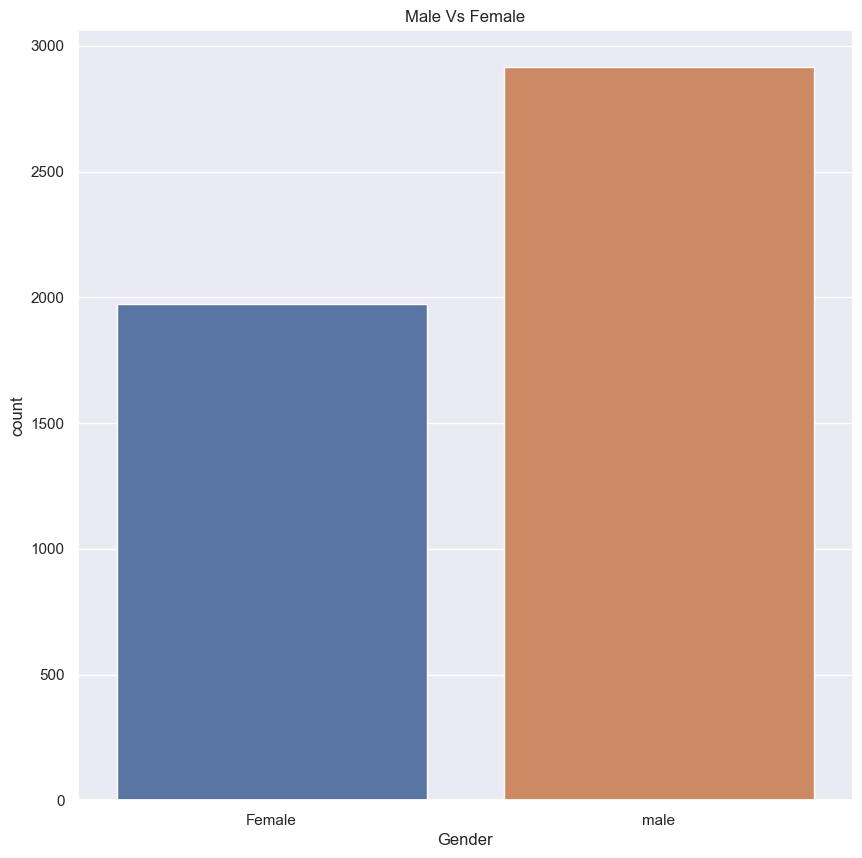

In [20]:
# using graps to analyse the graps
plt.figure(figsize=(10,10))
plt.title("Male Vs Female")
sns.countplot(data["Gender"])

<AxesSubplot:title={'center':'Count OF Occupation'}, xlabel='Occupation', ylabel='count'>

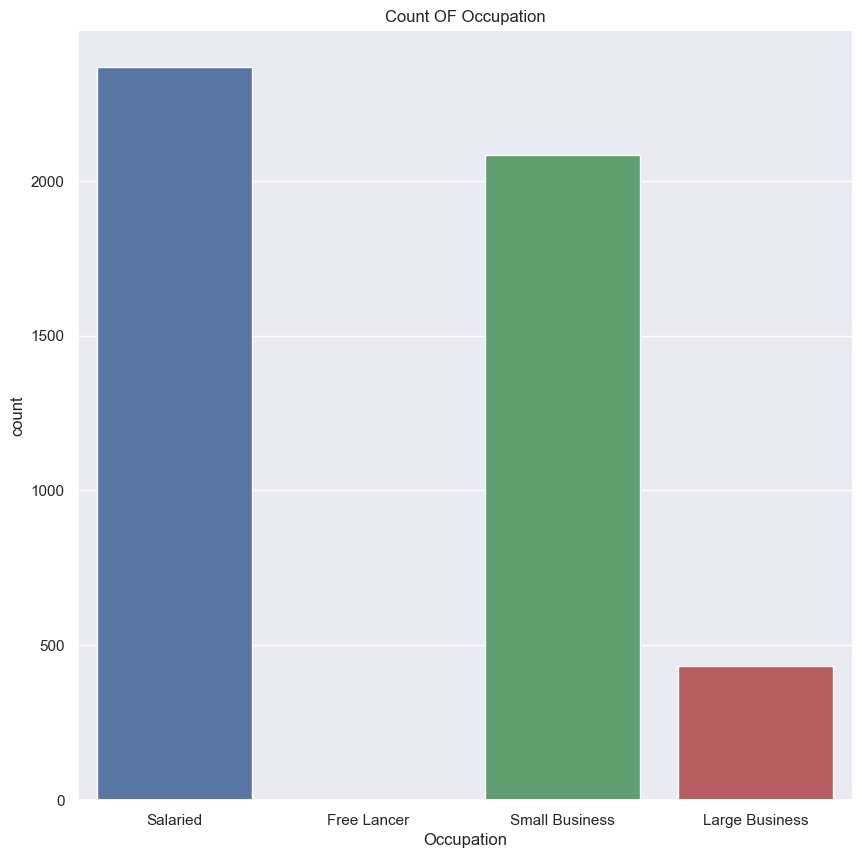

In [21]:
plt.figure(figsize=(10,10))
plt.title("Count OF Occupation")
sns.countplot(data["Occupation"])

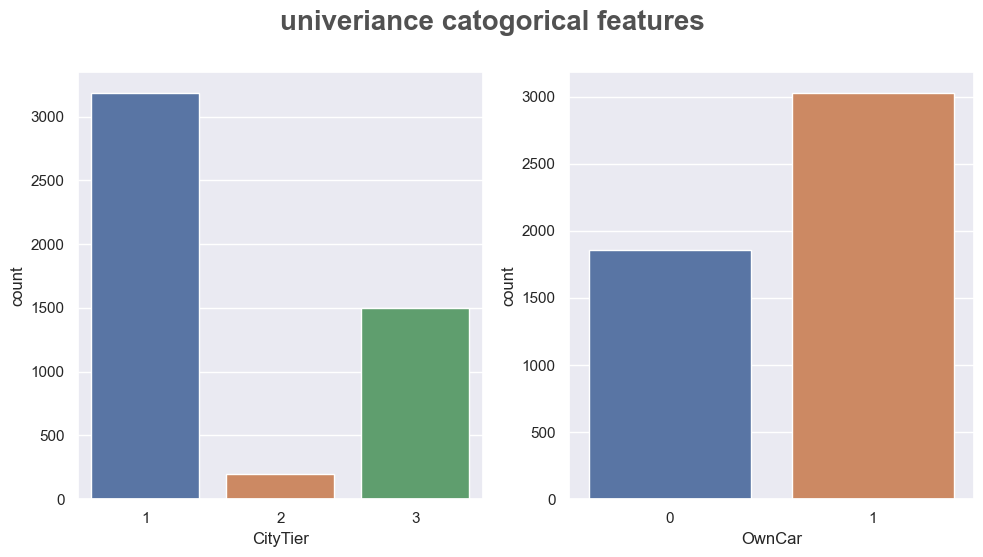

In [22]:
plt.figure(figsize=(10,10))
cato = ["CityTier","OwnCar"]
plt.suptitle("univeriance catogorical features",fontsize=20,fontweight="bold",alpha=0.8,y=1)
for i in range(0,len(cato)):
    plt.subplot(2,2,i+1)
    sns.countplot(x = data[cato[i]])
    plt.tight_layout()
        
        

In [23]:
numerical_features

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

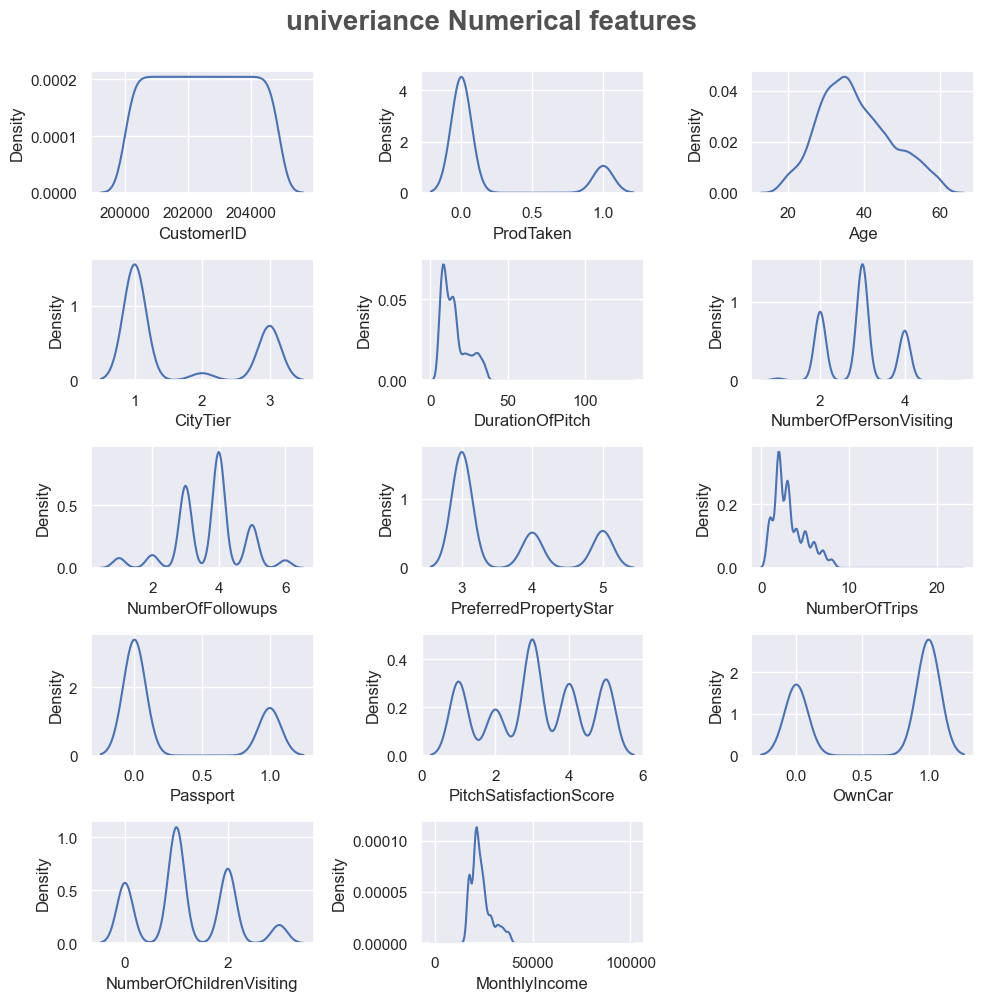

In [24]:
plt.figure(figsize=(10,10))
plt.suptitle("univeriance Numerical features",fontsize=20,fontweight="bold",alpha=0.8,y=1)
for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = (data[numerical_features[i]]))
    plt.tight_layout()

<AxesSubplot:ylabel='TypeofContact'>

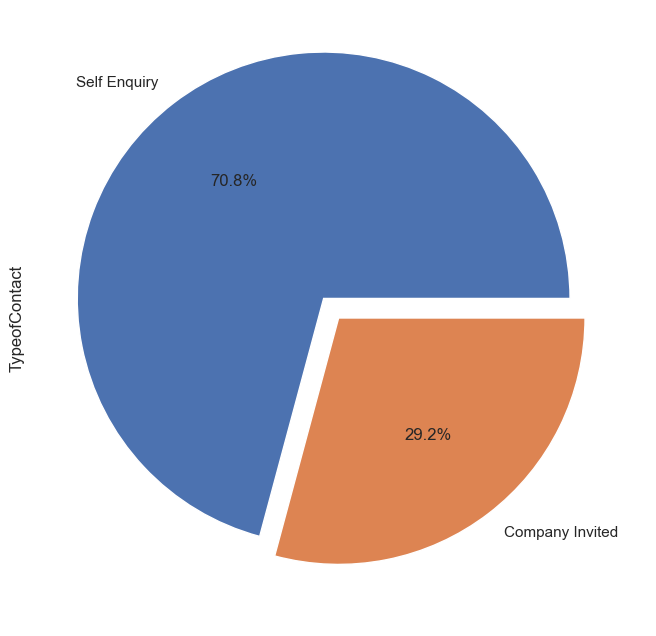

In [25]:
data['TypeofContact'].value_counts().plot.pie(explode=(0.1,0),autopct="%1.1f%%")

In [26]:
catiagorical_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

<AxesSubplot:ylabel='Designation'>

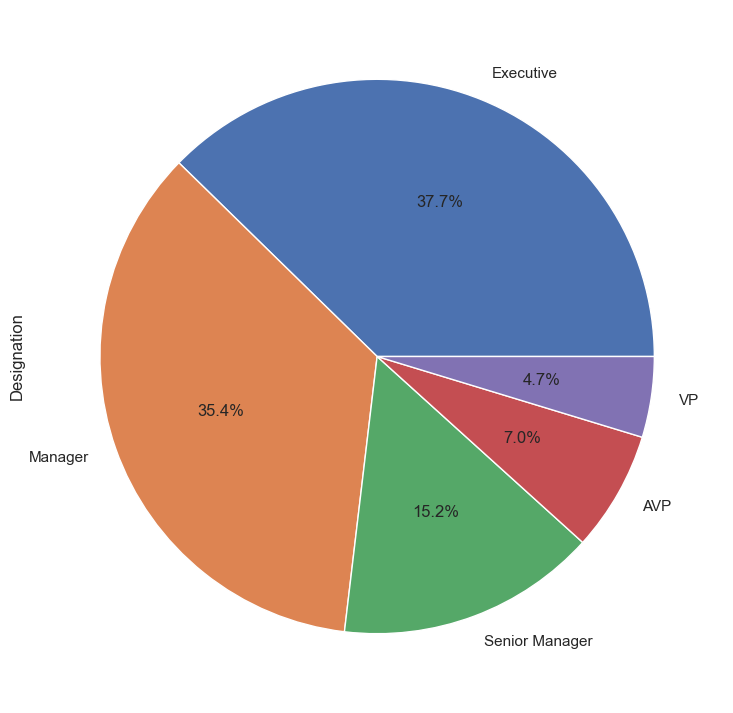

In [27]:
plt.figure(figsize=(9,9))
data['Designation'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:>

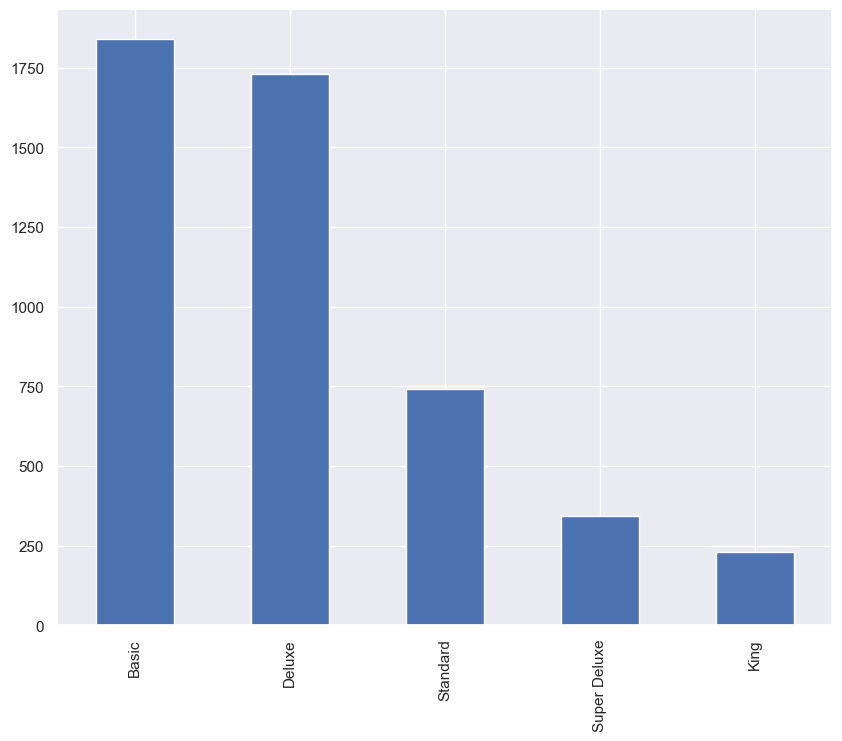

In [28]:
data["ProductPitched"].value_counts().plot.bar()

In [29]:
income = data.groupby("Designation")["MonthlyIncome"].sum().sort_values(ascending=False).reset_index()

In [30]:
income

,Designation,MonthlyIncome
0,Manager,35912048.0
1,Executive,34994564.0
2,Senior Manager,19765210.0
3,AVP,11026438.0
4,VP,8252158.0


<AxesSubplot:title={'center':'Income'}, xlabel='Designation', ylabel='MonthlyIncome'>

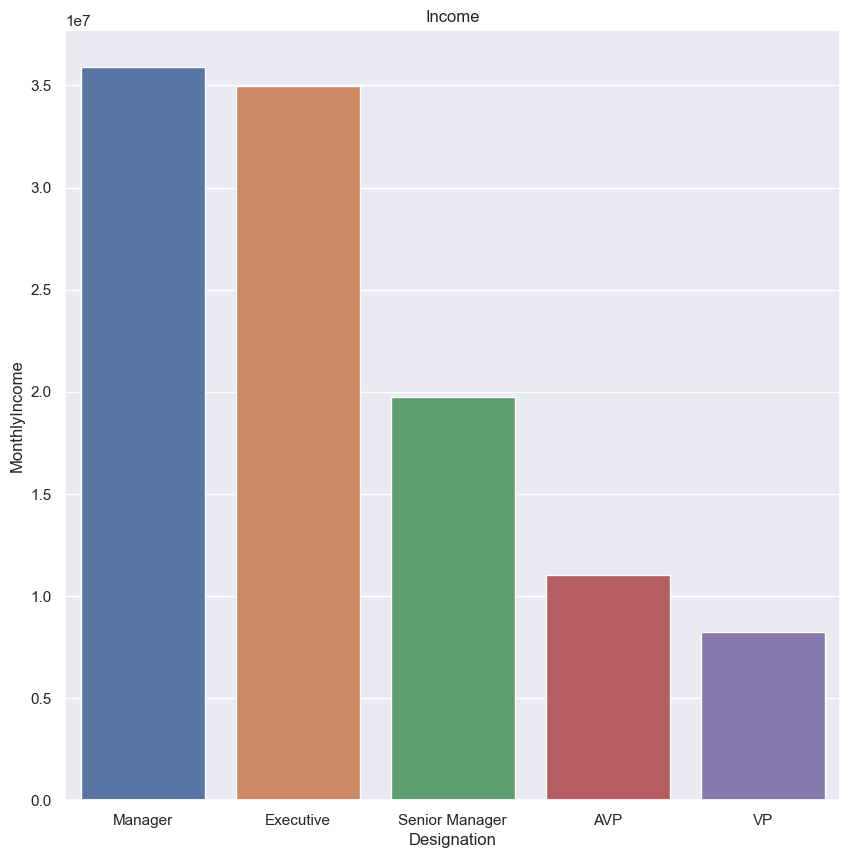

In [66]:
plt.figure(figsize=(10,10))
plt.title("Income")
sns.barplot(x="Designation",y="MonthlyIncome",data=income)

In [58]:
age = data.groupby("MaritalStatus")["Age"].sum().sort_values(ascending=False)

In [59]:
age

MaritalStatus
Married      85751.0
Divorced     34894.0
Single       29830.0
Unmarried    24920.0
Name: Age, dtype: float64

<AxesSubplot:ylabel='Age'>

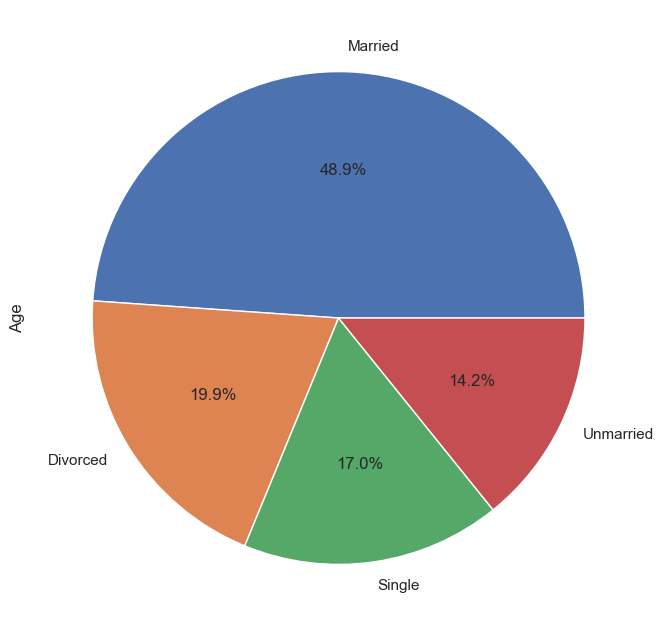

In [61]:
age.plot.pie(autopct="%1.1f%%")

In [68]:
star = data.groupby("ProductPitched")["PreferredPropertyStar"].sum().sort_values(ascending=False).reset_index()

<AxesSubplot:title={'center':'PreferredPropertyStar'}, xlabel='PreferredPropertyStar', ylabel='ProductPitched'>

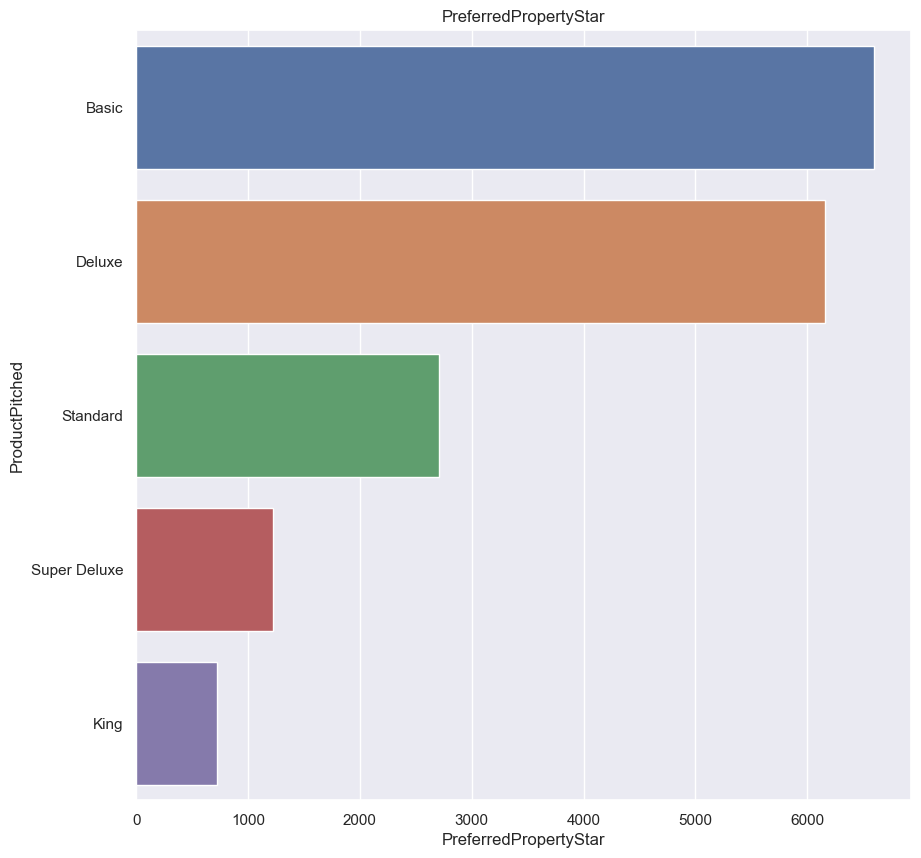

In [69]:
plt.figure(figsize=(10,10))
plt.title("PreferredPropertyStar")
sns.barplot(x="PreferredPropertyStar",y="ProductPitched",data=star)

<AxesSubplot:ylabel='MonthlyIncome'>

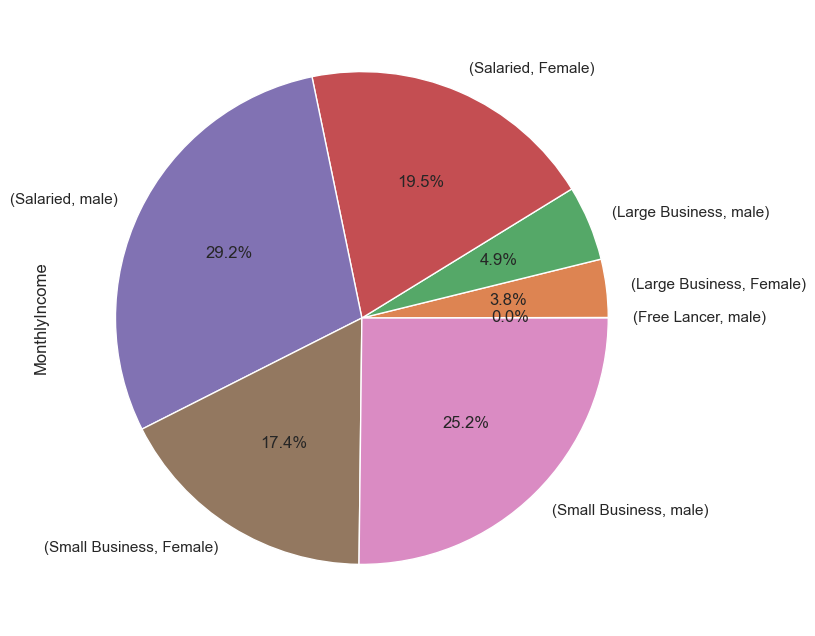

In [75]:
data.groupby(["Occupation","Gender"])["MonthlyIncome"].sum().plot.pie(autopct="%1.1f%%")

<AxesSubplot:xlabel='TypeofContact', ylabel='CityTier'>

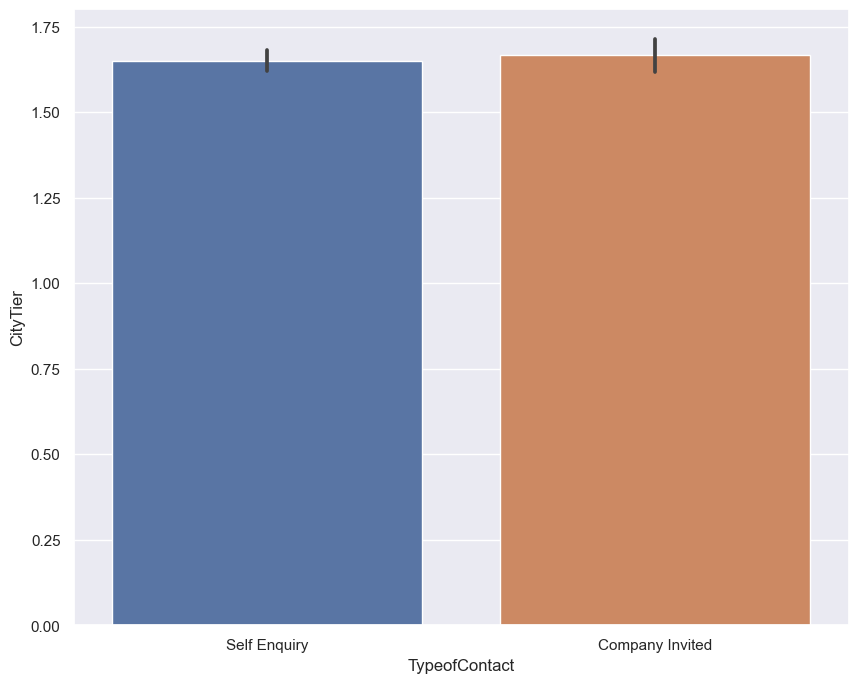

In [84]:
sns.barplot(x="TypeofContact",y="CityTier",data=data)

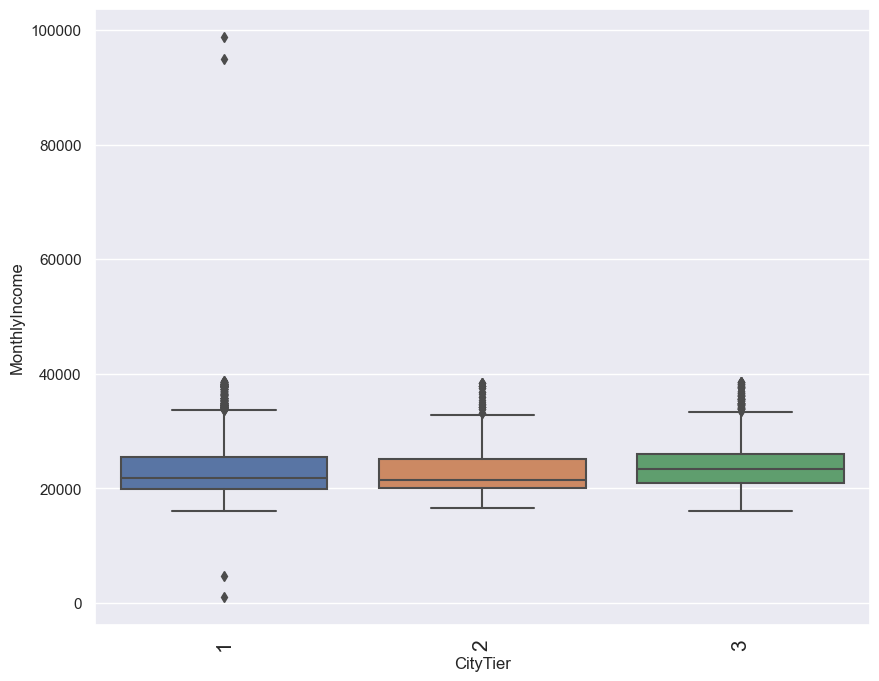

In [86]:
sns.boxplot(x = "CityTier",y="MonthlyIncome",data=data)
plt.xticks(size=15,rotation=90)
plt.show()

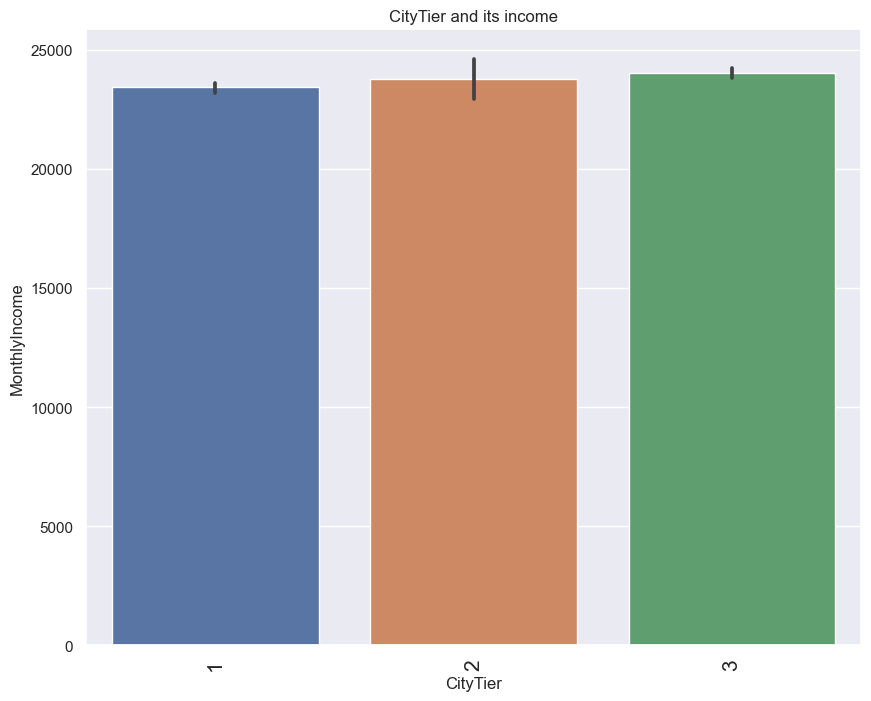

In [88]:
sns.barplot(x = "CityTier",y="MonthlyIncome",data=data)
plt.title("CityTier and its income")
plt.xticks(size=15,rotation=90)
plt.show()

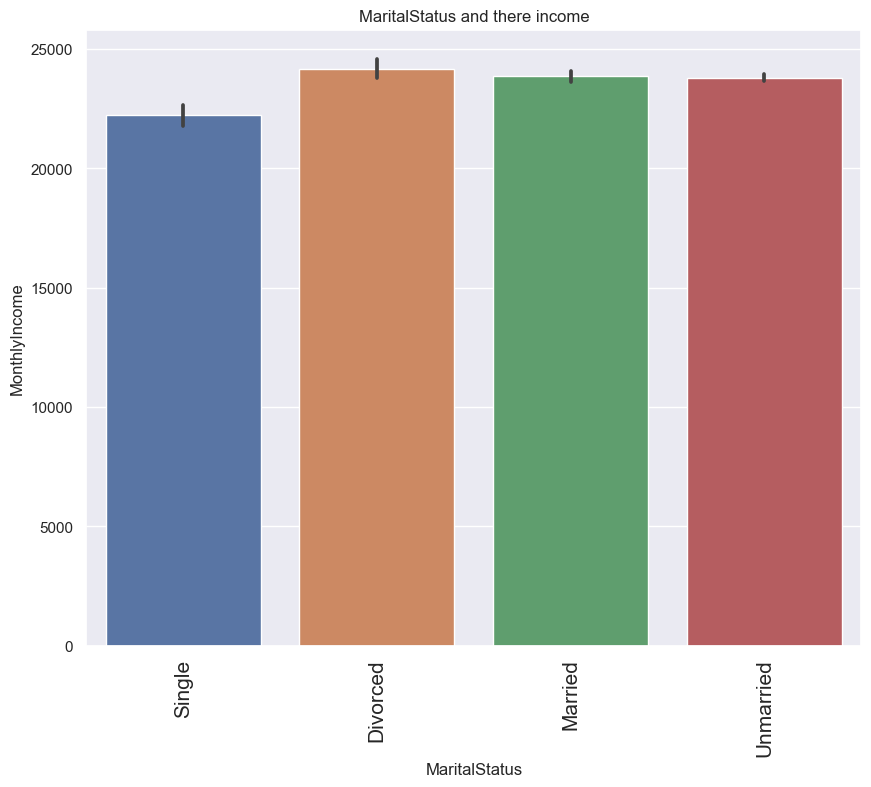

In [90]:
sns.barplot(x = "MaritalStatus",y="MonthlyIncome",data=data)
plt.title("MaritalStatus and there income")
plt.xticks(size=15,rotation=90)
plt.show()

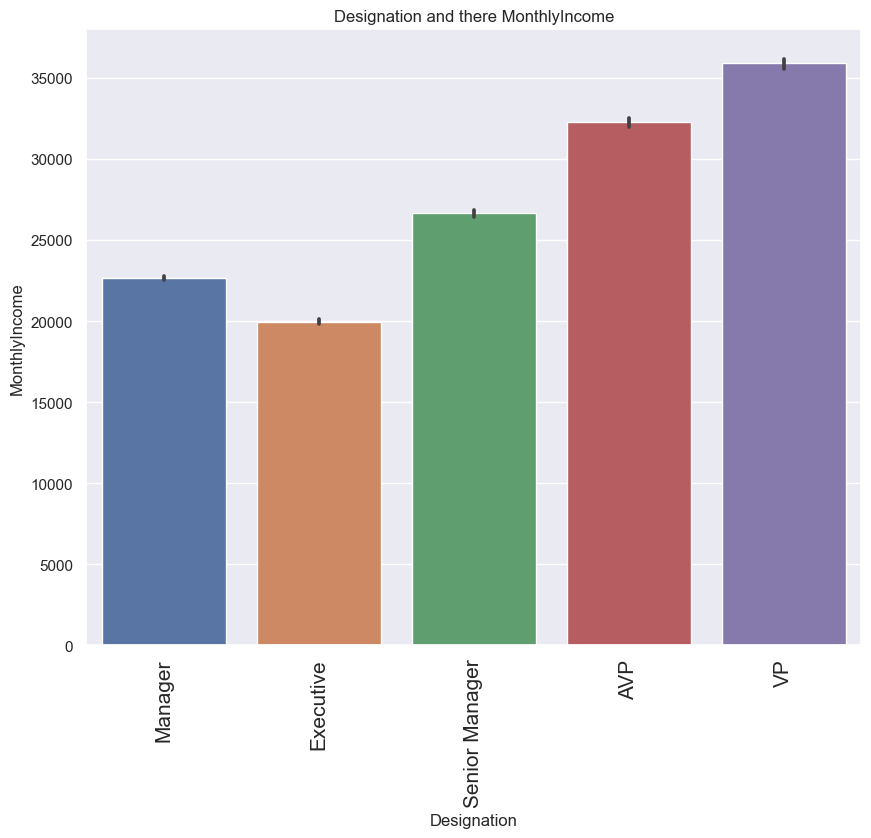

In [92]:
sns.barplot(x = "Designation",y="MonthlyIncome",data=data)
plt.title("Designation and there MonthlyIncome")
plt.xticks(size=15,rotation=90)
plt.show()

In [94]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


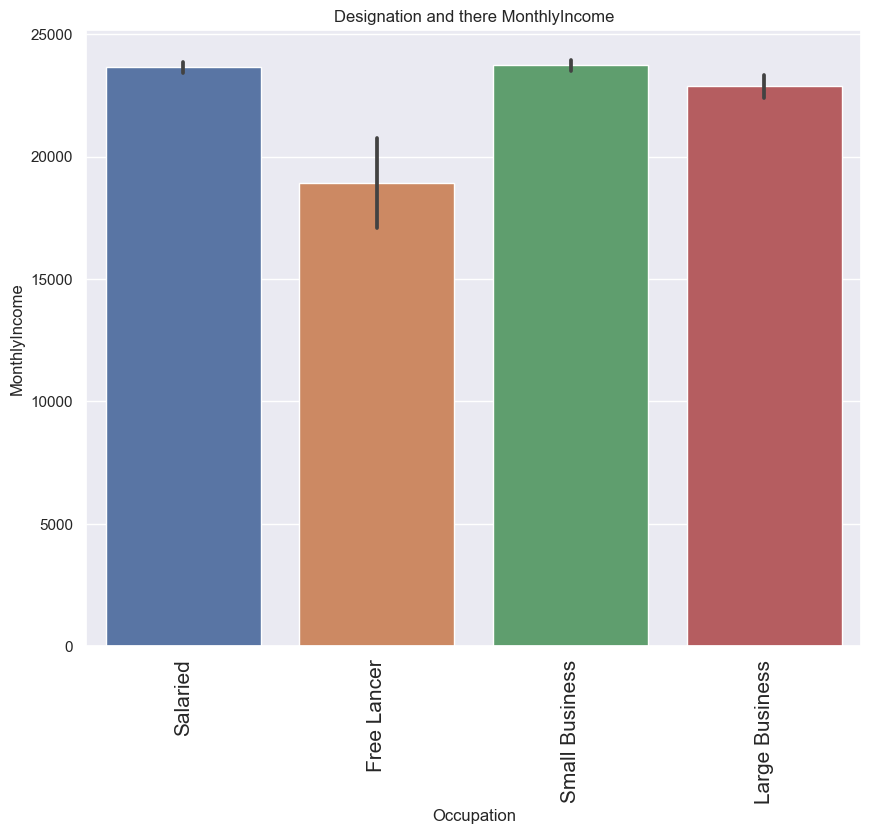

In [95]:
sns.barplot(x = "Occupation",y="MonthlyIncome",data=data)
plt.title("Designation and there MonthlyIncome")
plt.xticks(size=15,rotation=90)
plt.show()